In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
from datetime import date
import dateutil.relativedelta

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import fbprophet
from fbprophet import Prophet

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import time

Importing plotly failed. Interactive plots will not work.


In [2]:
A=pd.read_csv("issues.csv")

In [3]:
df_data = pd.read_csv('issues.csv', parse_dates=['created_at'])

In [4]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [5]:
week_df = df_data.groupby(df_data['created_at'].dt.day_name()).count().reindex(days)
week_df

,issue_number,OriginationPhase,DetectionPhase,Category,Priority,Status,created_at,closed_at,Author
created_at,,,,,,,,,
Monday,295,295,295,295,295,295,295,139,295
Tuesday,273,273,273,273,273,273,273,89,273
Wednesday,281,281,281,281,281,281,281,150,281
Thursday,298,298,298,298,298,298,298,190,298
Friday,302,302,302,302,302,302,302,109,302
Saturday,273,273,273,273,273,273,273,144,273
Sunday,278,278,278,278,278,278,278,175,278


In [6]:
week_df['created_at'].max()

302

In [7]:
week_df['weekday'] = week_df.index

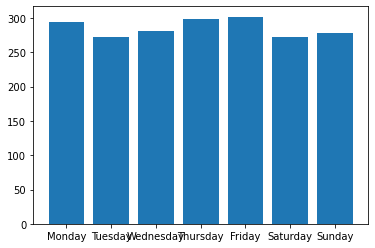

In [8]:
x = week_df['weekday']
y = week_df['issue_number']
plt.bar(x,y)
plt.show()

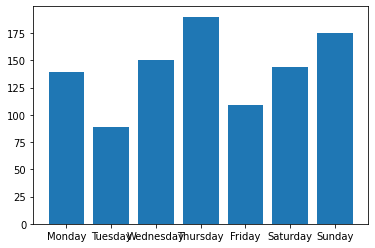

In [9]:
plt.bar(week_df['weekday'],week_df['closed_at'])
plt.show()

In [10]:
A=pd.read_csv("issues.csv")

In [11]:
df_data1 = pd.read_csv('issues.csv', parse_dates=['closed_at'])

In [12]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [13]:
month_df = df_data1.groupby(df_data1['closed_at'].dt.month_name()).count().reindex(months)
month_df

,issue_number,OriginationPhase,DetectionPhase,Category,Priority,Status,created_at,closed_at,Author
closed_at,,,,,,,,,
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
March,376.0,376.0,376.0,376.0,376.0,376.0,376.0,376.0,376.0
April,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0
May,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0
June,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0
July,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0
August,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0
September,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0


In [14]:
month_df['month'] = month_df.index

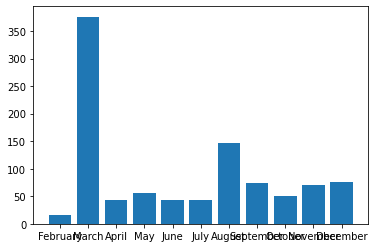

In [15]:
plt.bar(month_df['month'],month_df['closed_at'])
plt.show()

In [16]:
df = pd.read_csv('issues.csv')

<AxesSubplot:xlabel='created_at'>

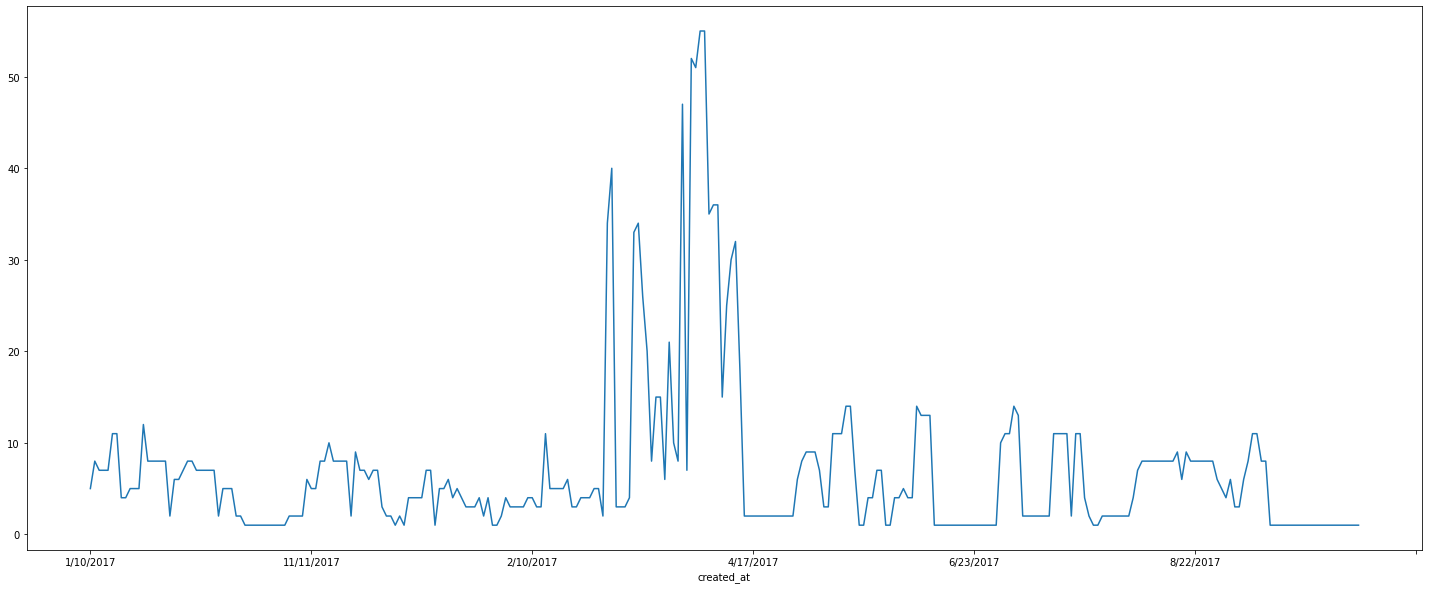

In [17]:
DailyIssue = df.groupby(['created_at']).created_at.count()
DailyIssue.plot(figsize= (25, 10))

In [18]:
df1 = df.groupby(['created_at'], as_index = False).count()
dataFrame = df1[['created_at','issue_number']]
dataFrame.columns = ['ds', 'y']
dataFrame
dataFrame.to_csv (r'github_data.csv', index = None, header=True) 

In [19]:
df = pd.read_csv('github_data.csv')


In [20]:
df['ds'] = df['ds'].astype('datetime64[ns]')
array = df.to_numpy()
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])

In [21]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

{'times': array([1.4840280e+09, 1.4841144e+09, 1.4842008e+09, 1.4842872e+09,
       1.4843736e+09, 1.4844600e+09, 1.4845464e+09, 1.4846328e+09,
       1.4847192e+09, 1.4848056e+09, 1.4848920e+09, 1.4849784e+09,
       1.4850648e+09, 1.4835960e+09, 1.4836824e+09, 1.4837688e+09,
       1.4838552e+09, 1.4839416e+09, 1.5068340e+09, 1.5076116e+09,
       1.5076980e+09, 1.5077844e+09, 1.5078708e+09, 1.5079572e+09,
       1.5080436e+09, 1.5081300e+09, 1.5082164e+09, 1.5083028e+09,
       1.5083892e+09, 1.5069204e+09, 1.5084756e+09, 1.5085620e+09,
       1.5086484e+09, 1.5087348e+09, 1.5088212e+09, 1.5089076e+09,
       1.5089940e+09, 1.5090804e+09, 1.5091668e+09, 1.5092532e+09,
       1.5070068e+09, 1.5093396e+09, 1.5070932e+09, 1.5071796e+09,
       1.5072660e+09, 1.5073524e+09, 1.5074388e+09, 1.5075252e+09,
       1.5095124e+09, 1.5102936e+09, 1.5103800e+09, 1.5104664e+09,
       1.5105528e+09, 1.5106392e+09, 1.5107256e+09, 1.5108120e+09,
       1.5108984e+09, 1.5109848e+09, 1.5110712e+09, 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\mukti\AppData\Local\Temp\tmpwujezkof\model.ckpt.
INFO:tensorflow:Loss for final step: None.


In [22]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-28T20:12:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mukti\AppData\Local\Temp\tmpwujezkof\model.ckpt-0
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-11-28-20:12:58
INFO:tensorflow:Saving dict for global step 0: average_loss = 644331.56, covariance = [[[1.70436335e+00]
  [2.81223059e-01]
  [1.56216371e+00]
  [1.28934264e+00]
  [6.20425344e-01]
  [1.98310539e-01]
  [2.6

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

In [23]:
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mukti\AppData\Local\Temp\tmpwujezkof\model.ckpt-0
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


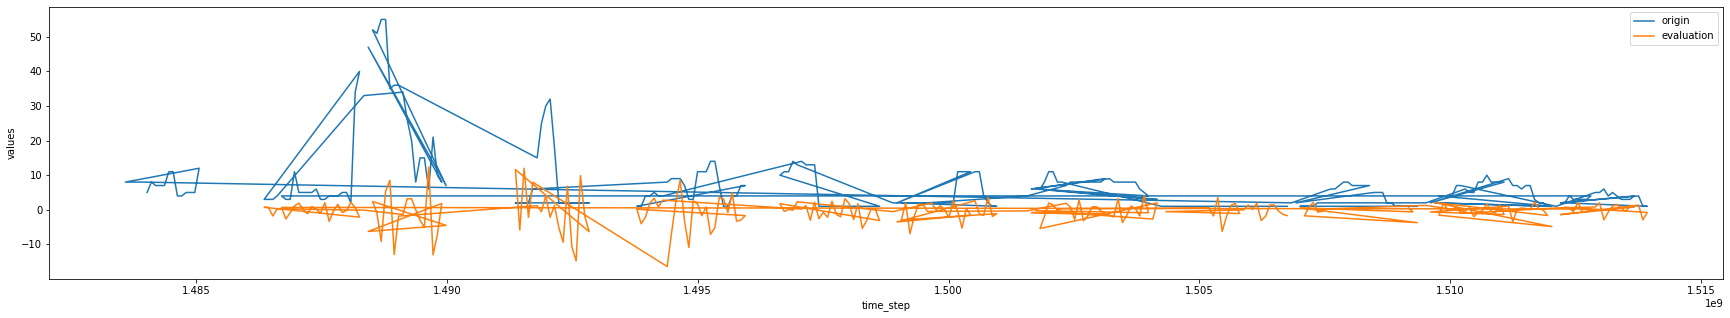

In [24]:
plt.figure(figsize=(30, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()


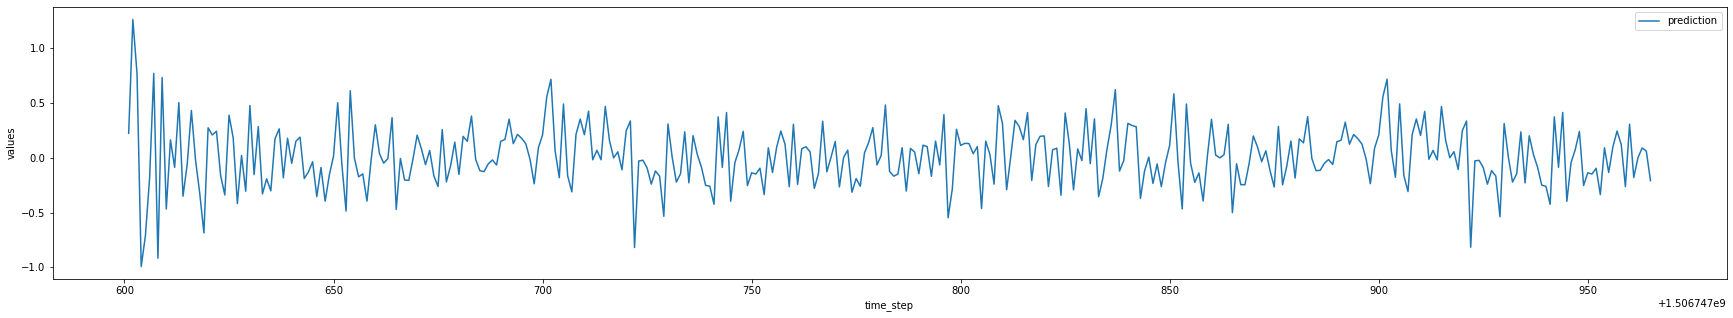

In [25]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

In [26]:
df = pd.read_csv('issues.csv')

<AxesSubplot:xlabel='closed_at'>

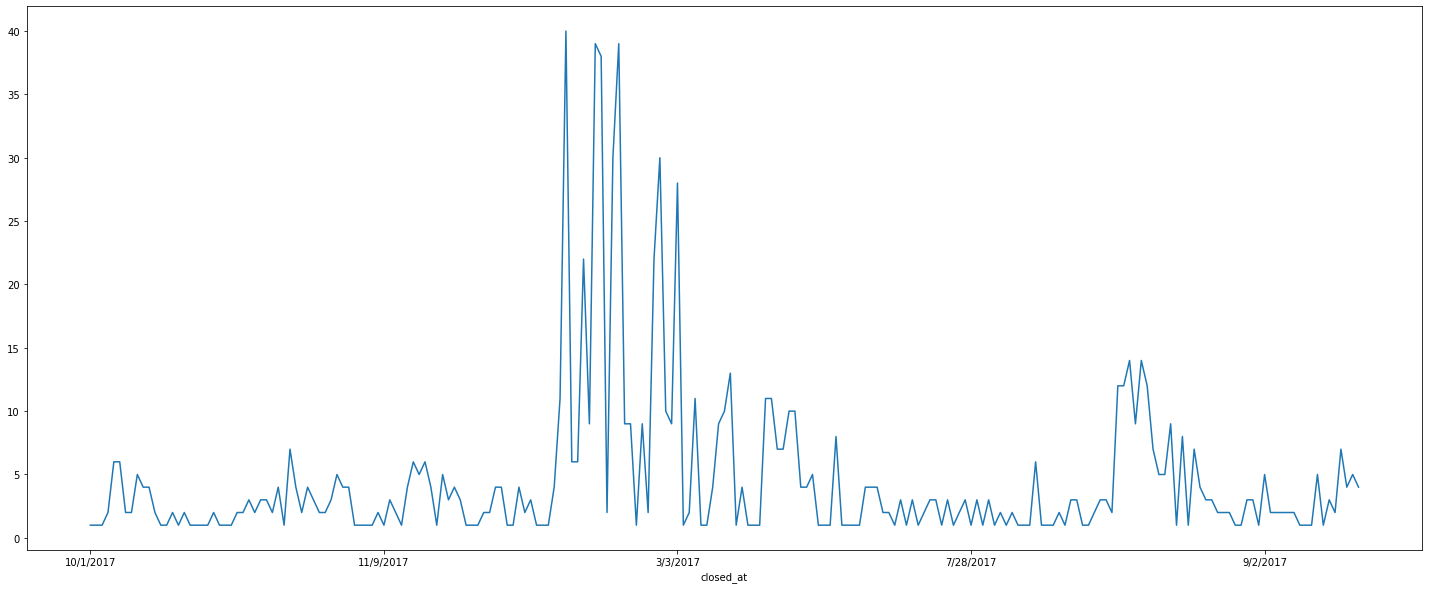

In [27]:
DailyIssue = df.groupby(['closed_at']).created_at.count()
DailyIssue.plot(figsize= (25, 10))

In [28]:
df1 = df.groupby(['closed_at'], as_index = False).count()
dataFrame = df1[['closed_at','issue_number']]
dataFrame.columns = ['ds', 'y']
dataFrame
dataFrame.to_csv (r'github_data.csv', index = None, header=True) 

In [29]:
df = pd.read_csv('github_data.csv')

In [30]:
df['ds'] = df['ds'].astype('datetime64[ns]')
array = df.to_numpy()
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])

In [31]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

{'times': array([1.5068340e+09, 1.5076116e+09, 1.5078708e+09, 1.5079572e+09,
       1.5080436e+09, 1.5083028e+09, 1.5083892e+09, 1.5069204e+09,
       1.5084756e+09, 1.5085620e+09, 1.5086484e+09, 1.5087348e+09,
       1.5088212e+09, 1.5089076e+09, 1.5089940e+09, 1.5090804e+09,
       1.5091668e+09, 1.5092532e+09, 1.5070068e+09, 1.5093396e+09,
       1.5071796e+09, 1.5072660e+09, 1.5073524e+09, 1.5074388e+09,
       1.5102936e+09, 1.5103800e+09, 1.5104664e+09, 1.5105528e+09,
       1.5106392e+09, 1.5107256e+09, 1.5108120e+09, 1.5108984e+09,
       1.5110712e+09, 1.5095988e+09, 1.5111576e+09, 1.5112440e+09,
       1.5113304e+09, 1.5114168e+09, 1.5115032e+09, 1.5115896e+09,
       1.5116760e+09, 1.5117624e+09, 1.5118488e+09, 1.5119352e+09,
       1.5120216e+09, 1.5097716e+09, 1.5098580e+09, 1.5099480e+09,
       1.5100344e+09, 1.5101208e+09, 1.5102072e+09, 1.5121080e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5134040e+09, 

In [32]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-28T20:13:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mukti\AppData\Local\Temp\tmppw9bh000\model.ckpt-0
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-11-28-20:13:09
INFO:tensorflow:Saving dict for global step 0: average_loss = 99319.45, covariance = [[[7.07834303e-01]
  [1.53699422e+00]
  [1.96212840e+00]
  [3.35287595e+00]
  [3.83600891e-01]
  [1.64950883e+00]
  [1.14

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

In [33]:
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mukti\AppData\Local\Temp\tmppw9bh000\model.ckpt-0
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


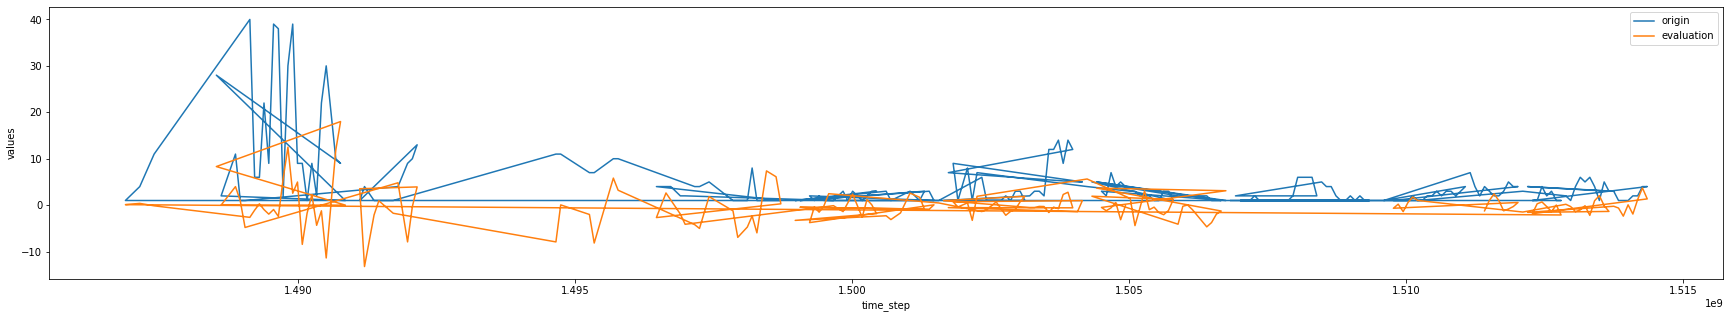

In [34]:
plt.figure(figsize=(30, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()


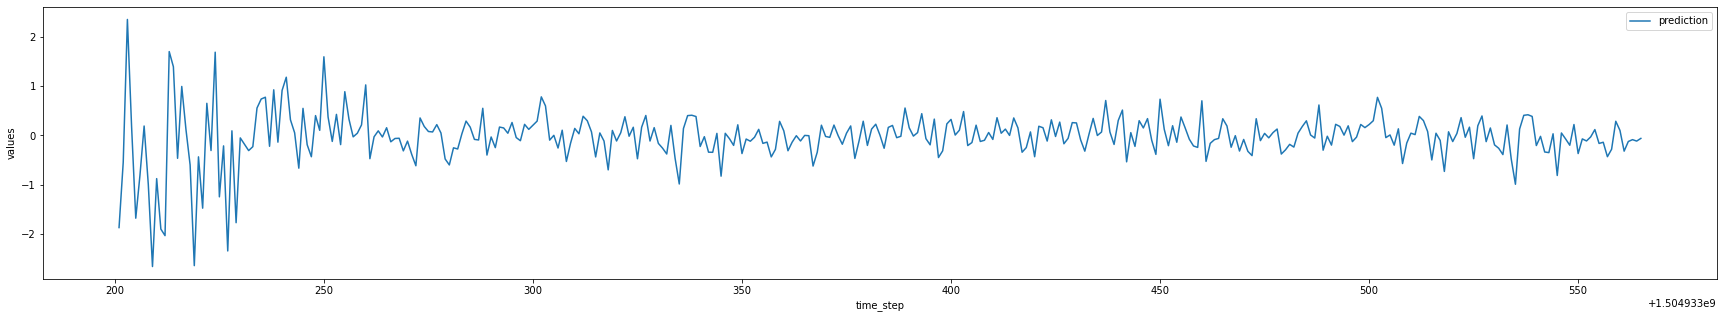

In [35]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()